## Species Diversity in United States' National Parks

The National Park Service collects presence and absence data in each of the  parks. In addition, 

This exploration relies on two NPS datasets: parks.csv and species.csv. For more information on the context of the NPS database and the content of the files, [see here](https://www.kaggle.com/nationalparkservice/park-biodiversity).

One point of clarification is that the term _species richness_ is the absolute number of species.

In [108]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pymongo import MongoClient
%matplotlib inline

client = MongoClient()

In [124]:
spcs = pd.read_csv("data/species.csv", low_memory=False, index_col='Species ID')

# missing statuses are assumed to be 'Not Threatened'
spcs['Conservation Status'].fillna('Not Threatened', inplace=True)

# filling in other missing values
spcs['Nativeness'].fillna('Unknown', inplace=True)
spcs['Abundance'].fillna('Unknown', inplace=True)
spcs['Order'].fillna('Unknown', inplace=True)
spcs['Family'].fillna('Unknown', inplace=True)

# dropping seasonality-- of which many values are missing
spcs.drop('Seasonality', axis=1, inplace=True)

# filtering out animals that are confirmed not to be present in a park
filtered_spcs = spcs[spcs['Occurrence'].isin(['Present', 'Not Confirmed'])]

In [110]:
# confirming there are no more missing values
filtered_spcs.isnull().sum()

Park Name              0
Category               0
Order                  0
Family                 0
Scientific Name        0
Common Names           0
Record Status          0
Occurrence             0
Nativeness             0
Abundance              0
Conservation Status    0
dtype: int64

In [111]:
parks = pd.read_csv("data/parks.csv")

def split_name(name):
    segments = name.split(' National')
    return segments[0]
    
parks['Axis Title'] = parks['Park Name'].map(split_name)

In [126]:
# groupby operation for our visualizations
by_status = filtered_spcs.groupby(['Park Name', 'Conservation Status']).size().unstack()

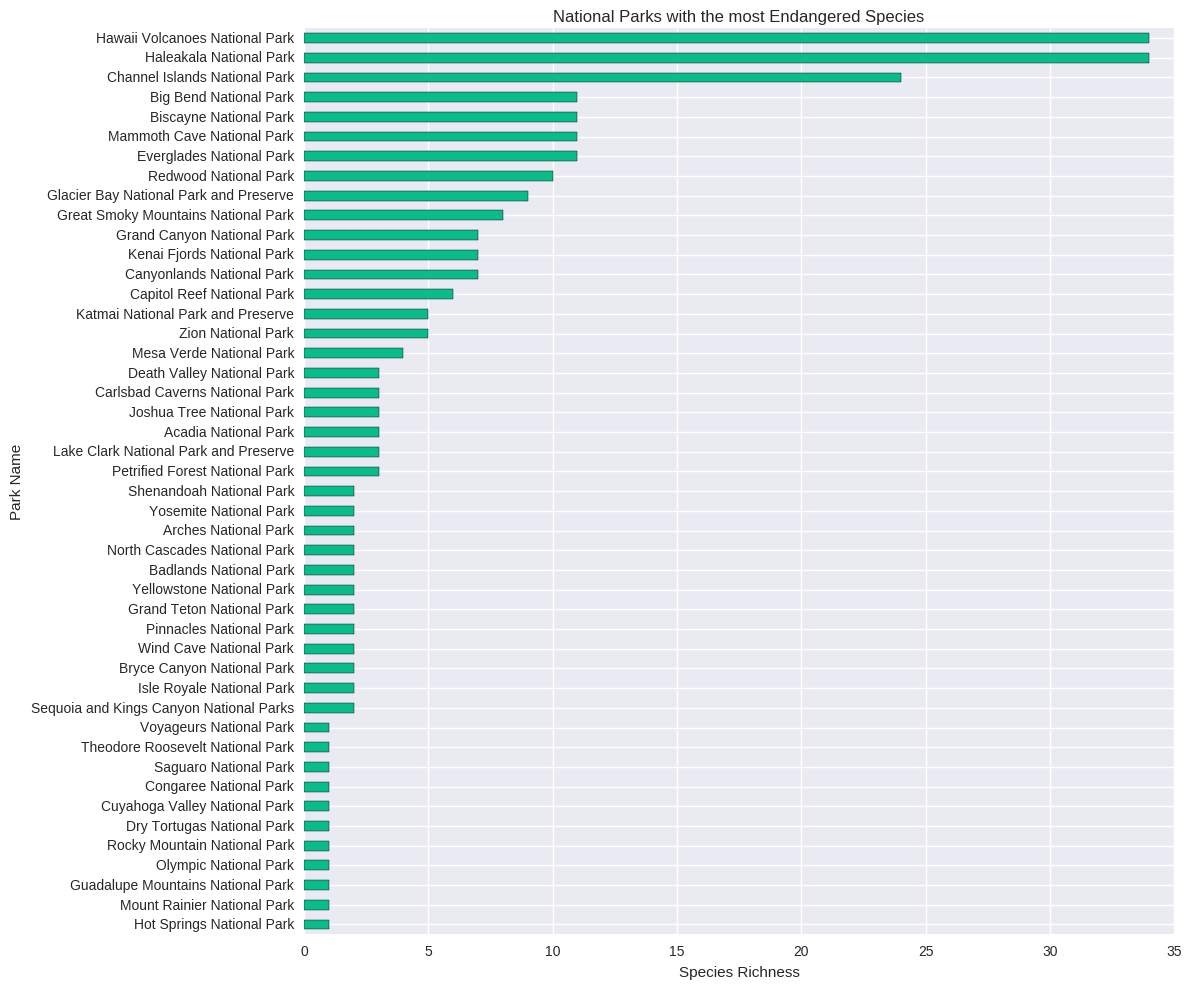

In [127]:
# first, taking a look at endangered species
by_status['Endangered'].dropna().sort_values(ascending=True).plot(kind='barh', color='#09BC8A')
plt.gcf().set_size_inches(12,10)
plt.title('National Parks with the most Endangered Species')
plt.xlabel('Species Richness')
plt.tight_layout()

In [129]:
# grouping our data by park name and category-- mammal, bird, reptile, etc.
by_park_and_cat = filtered_spcs.groupby(['Park Name', 'Category'])['Scientific Name'].size()
by_park_df = by_park_and_cat.unstack()
parks_data = pd.merge(parks, by_park_df, how='inner', left_on='Park Name', right_index=True)

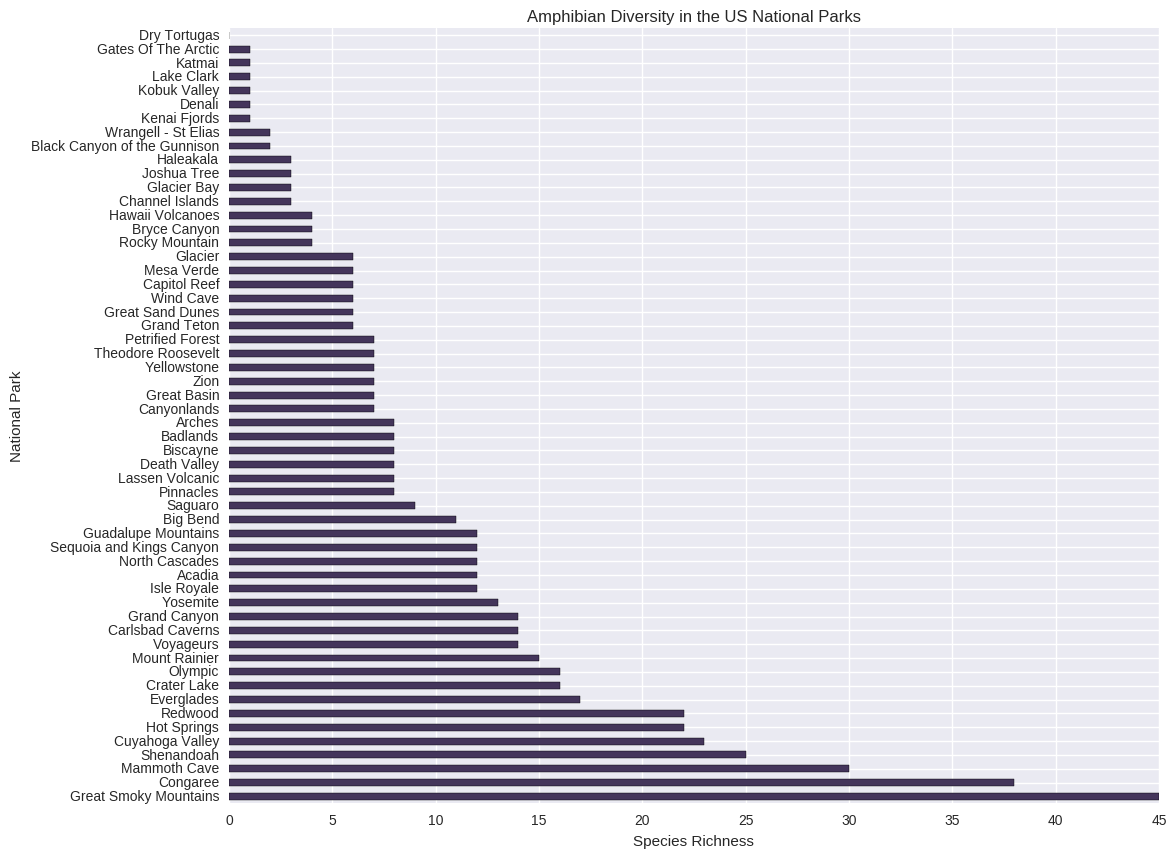

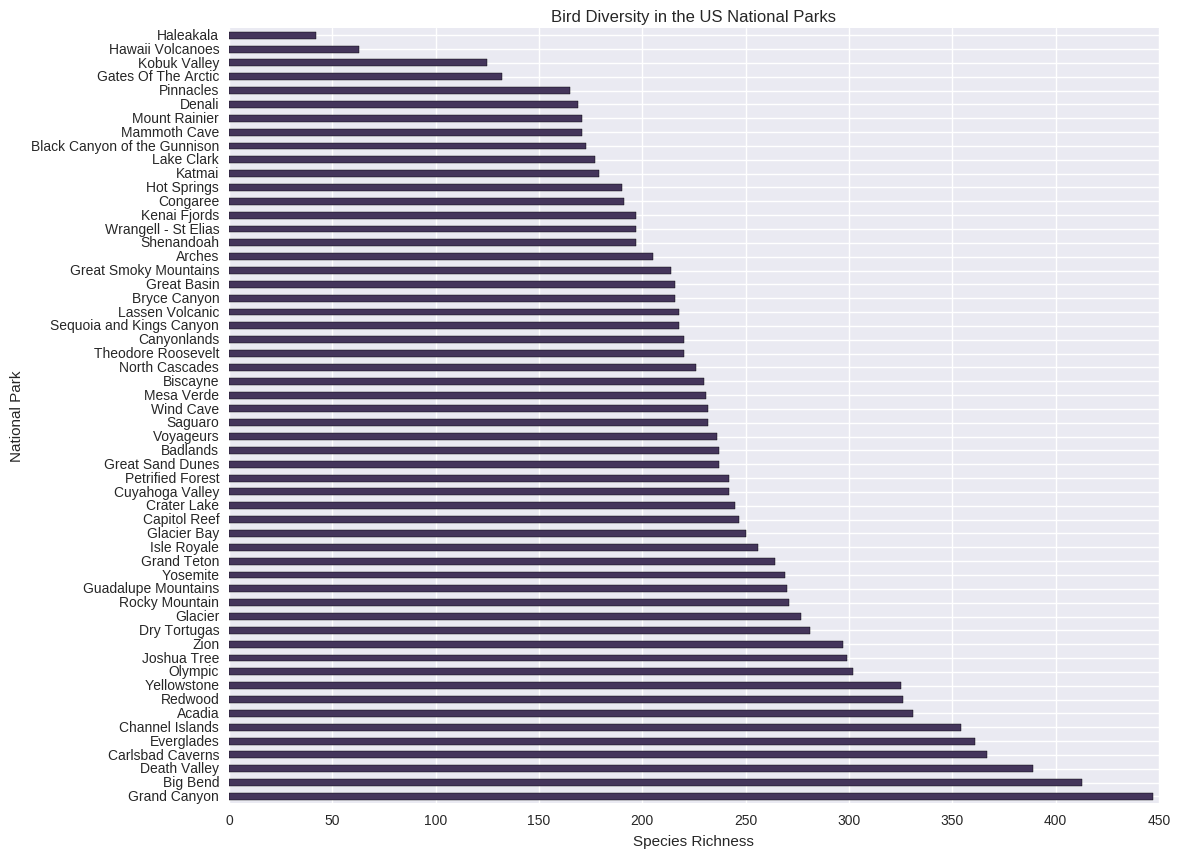

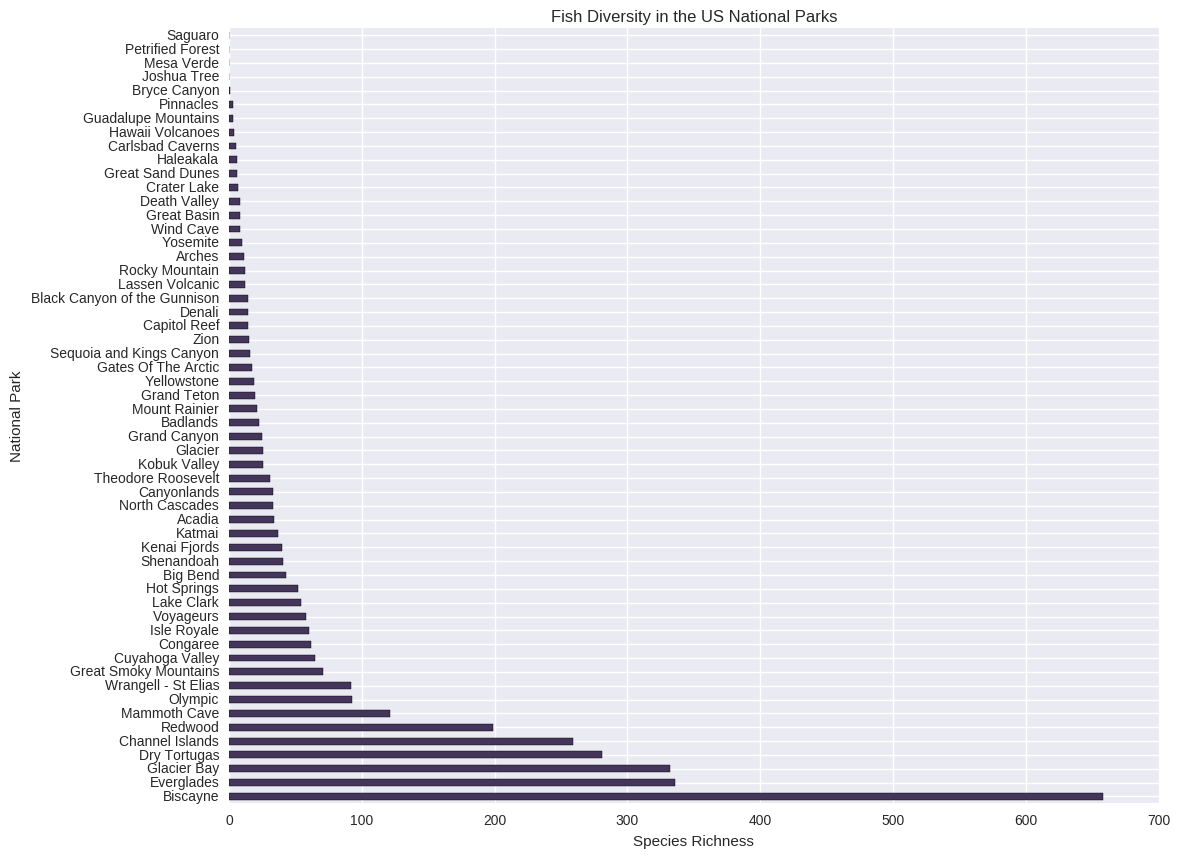

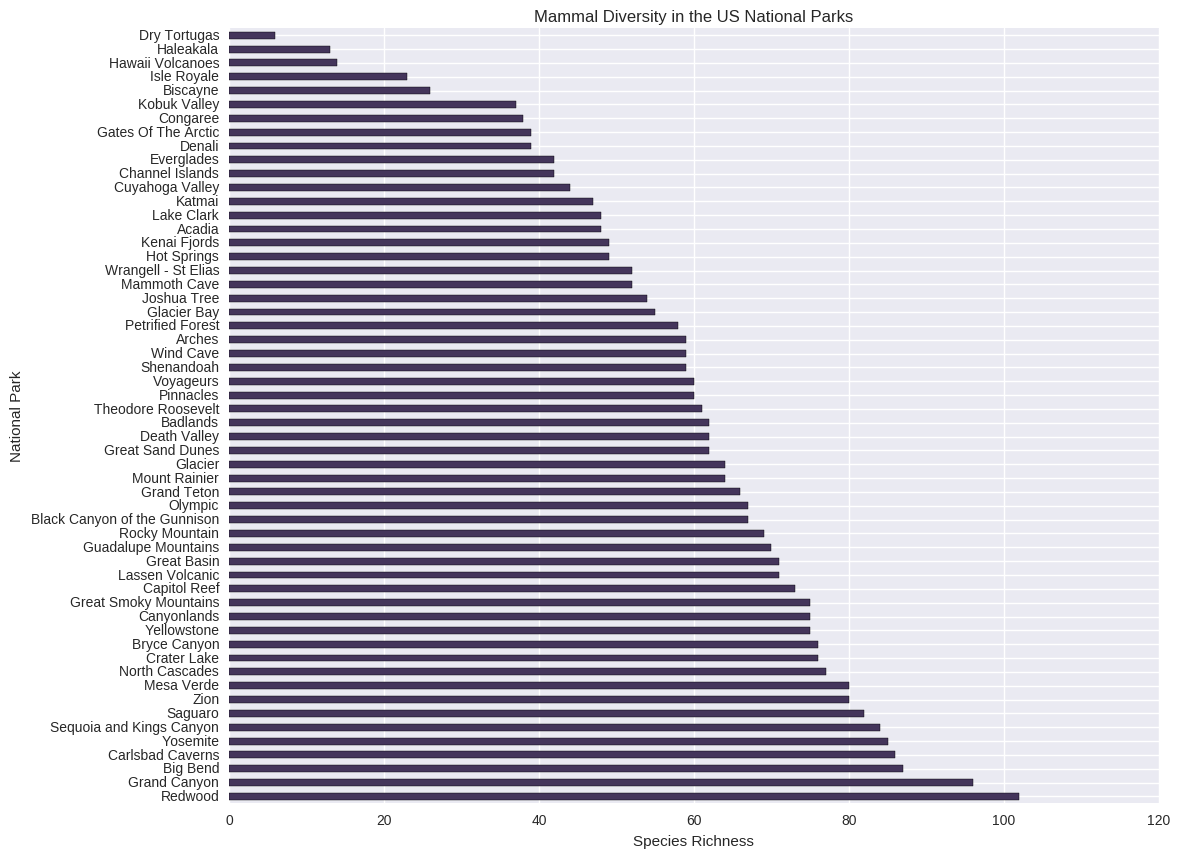

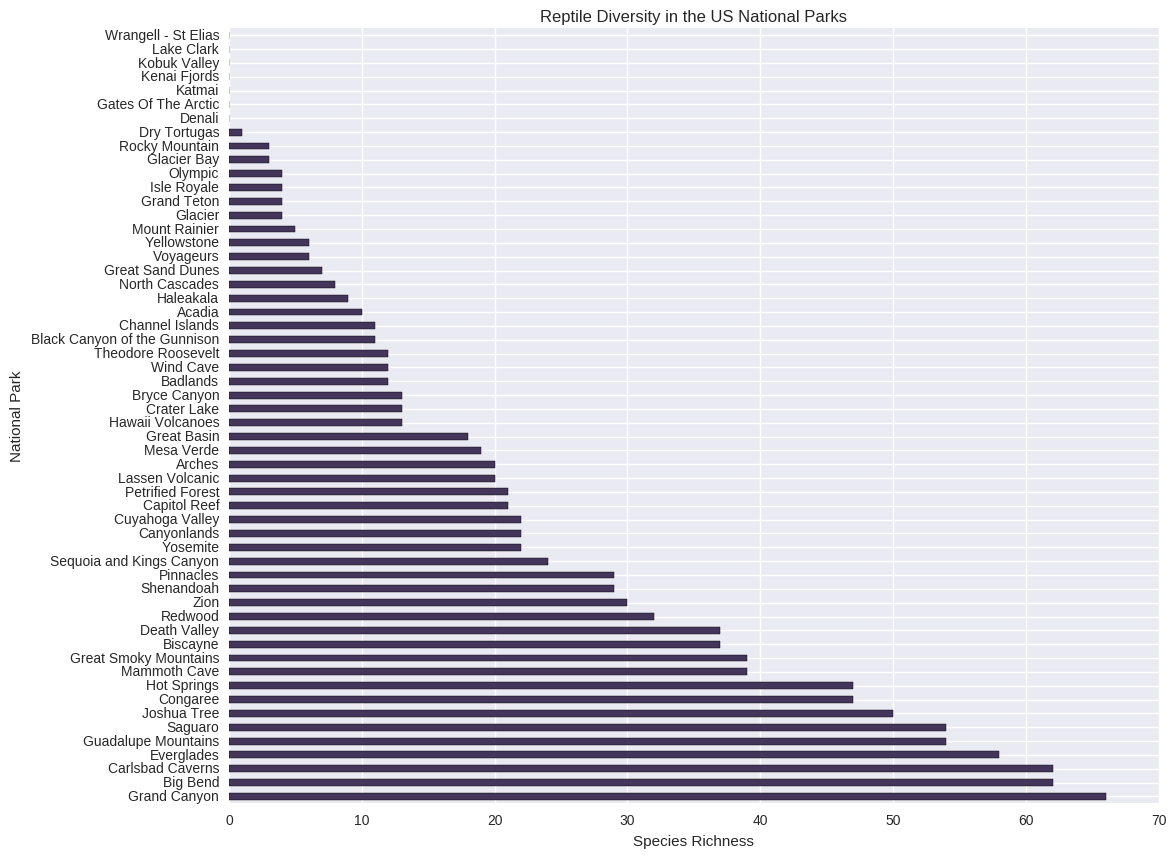

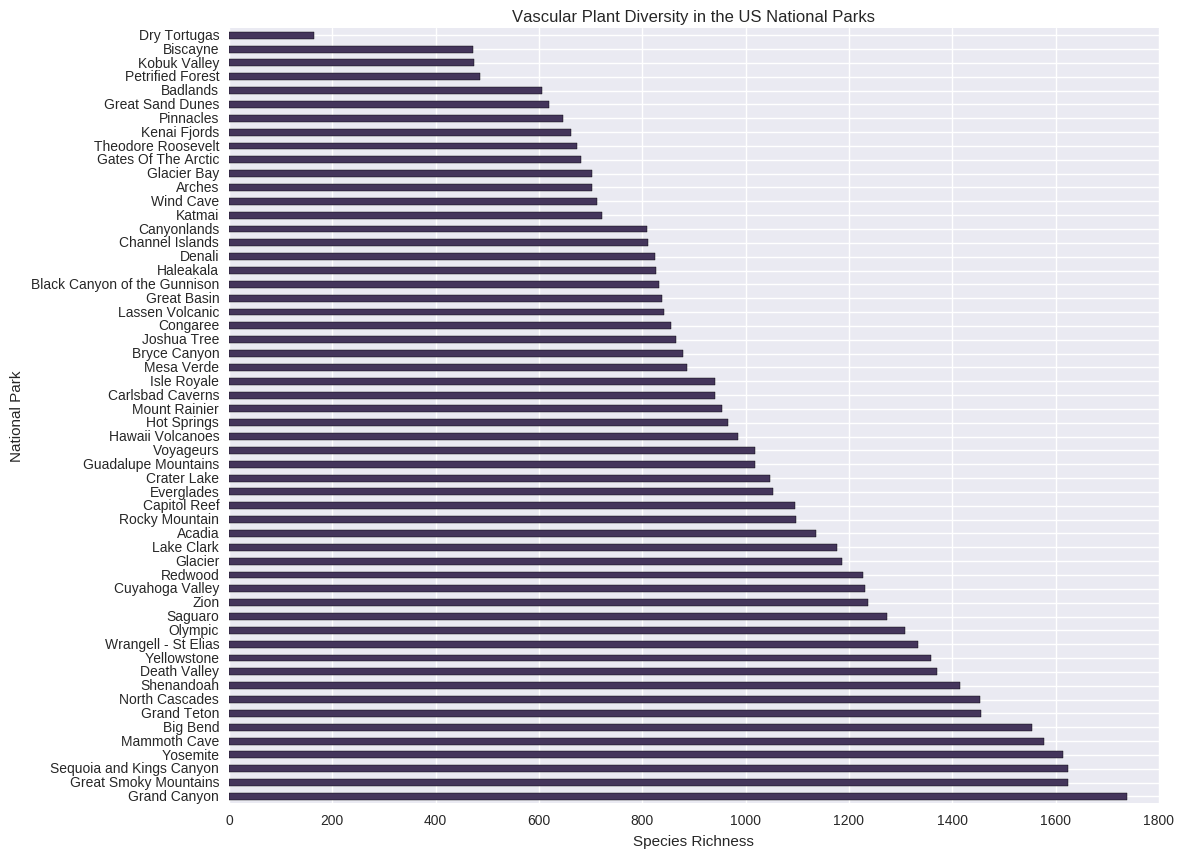

In [130]:
# first, looking at absolute diversity
parks_data = parks_data.set_index('Axis Title')
categories = ['Amphibian', 'Bird', 'Fish', 'Mammal', 'Reptile', 'Vascular Plant']
for cat in categories:
    frame = parks_data[cat]
    frame.sort_values(ascending=False).plot(kind ='barh', figsize=(12,10), color='#44355B')
    plt.xlabel('Species Richness')
    plt.ylabel('National Park')
    plt.title('{} Diversity in the US National Parks'.format(cat))
    plt.show()


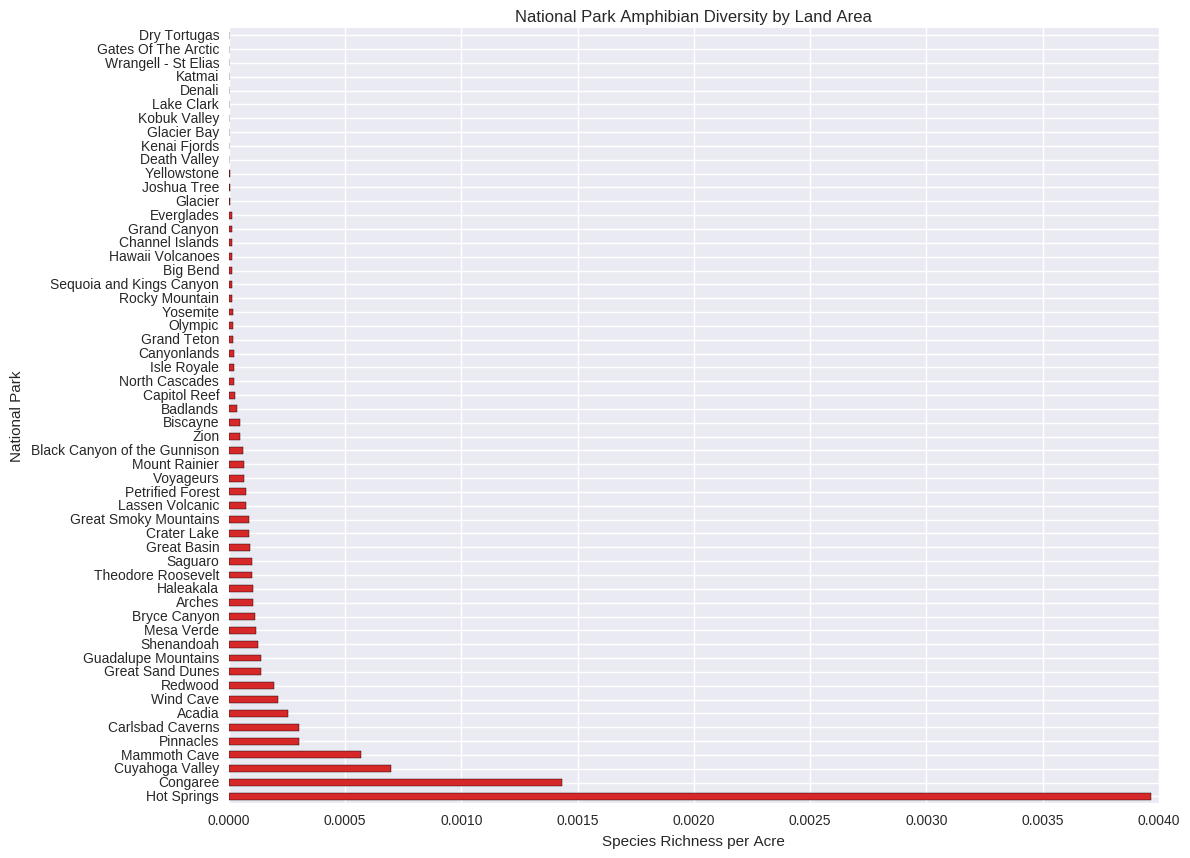

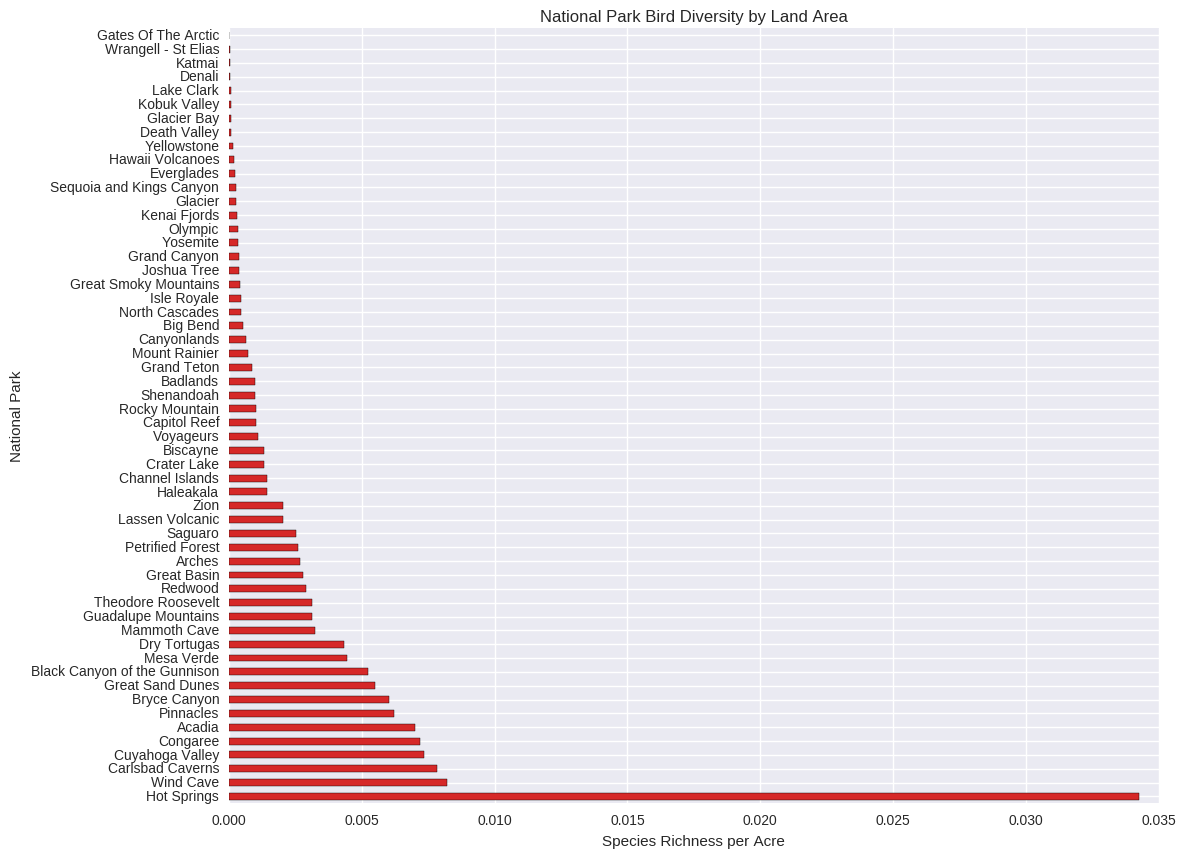

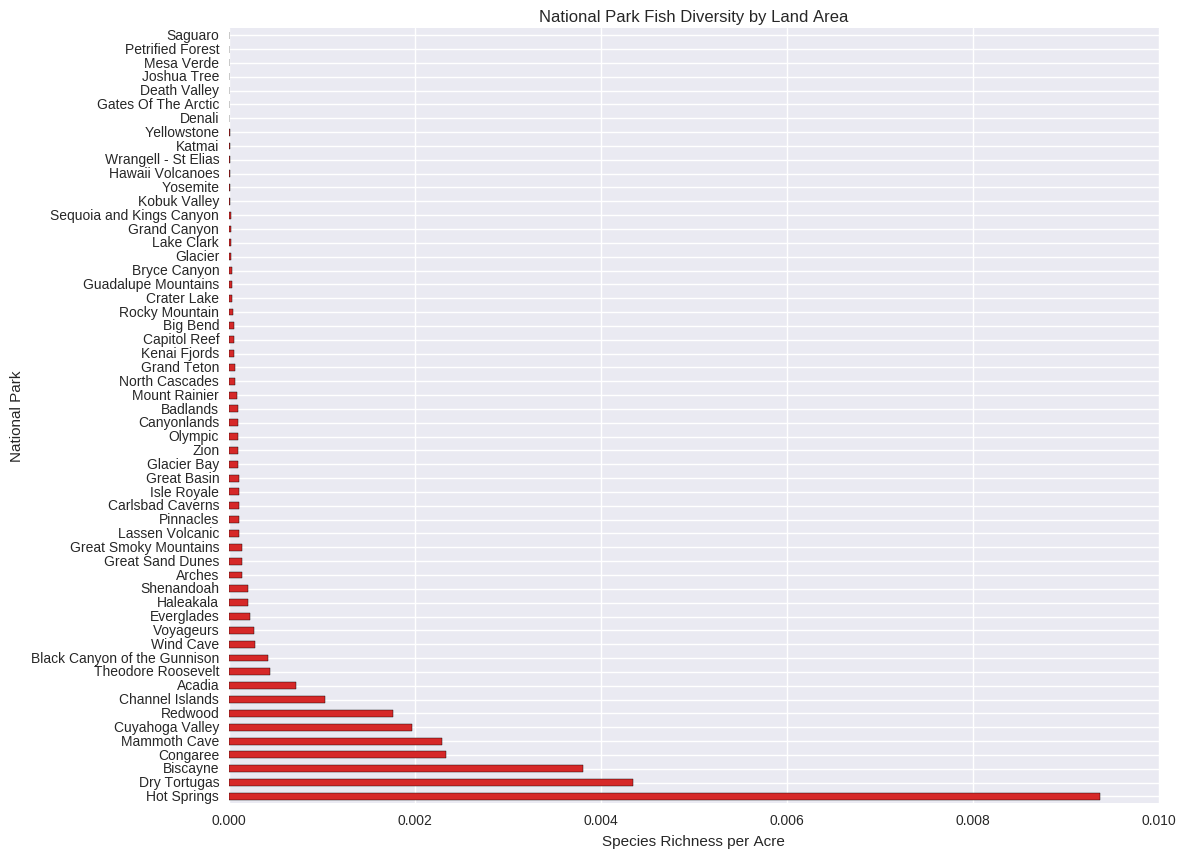

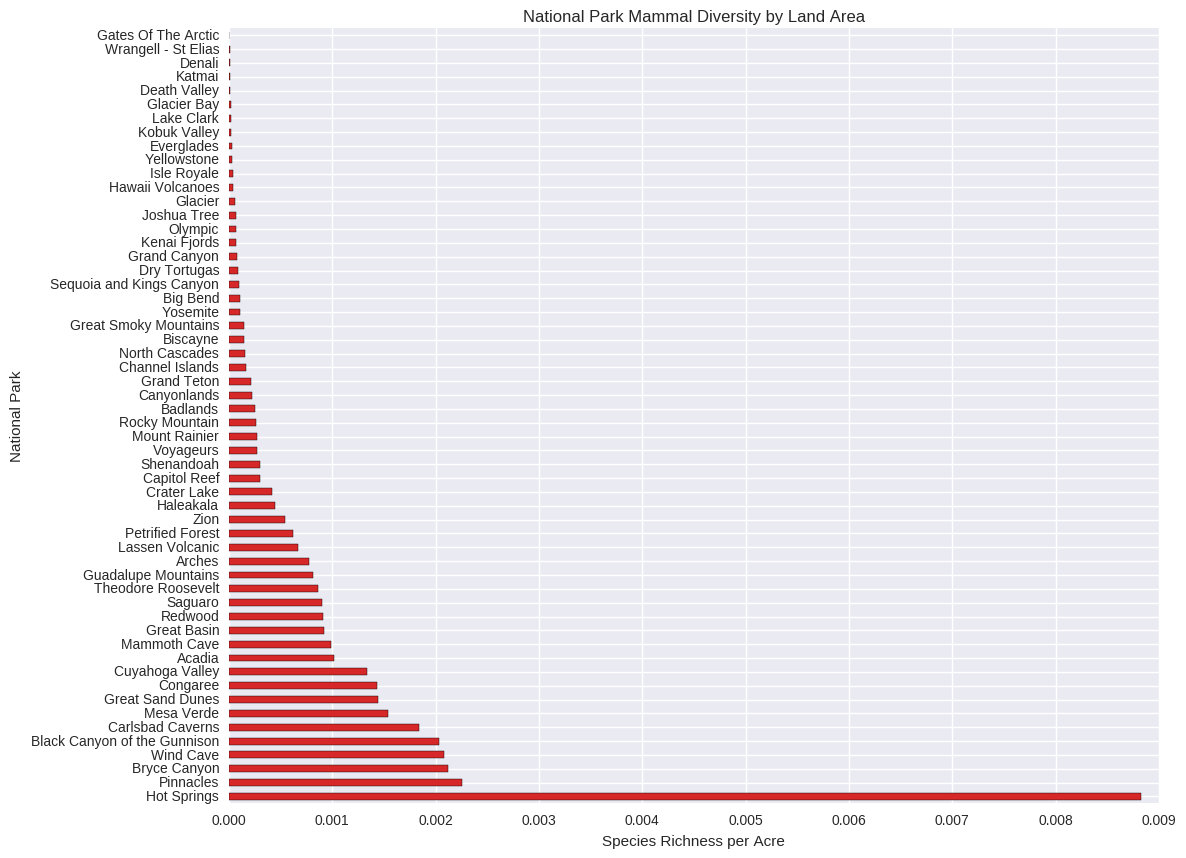

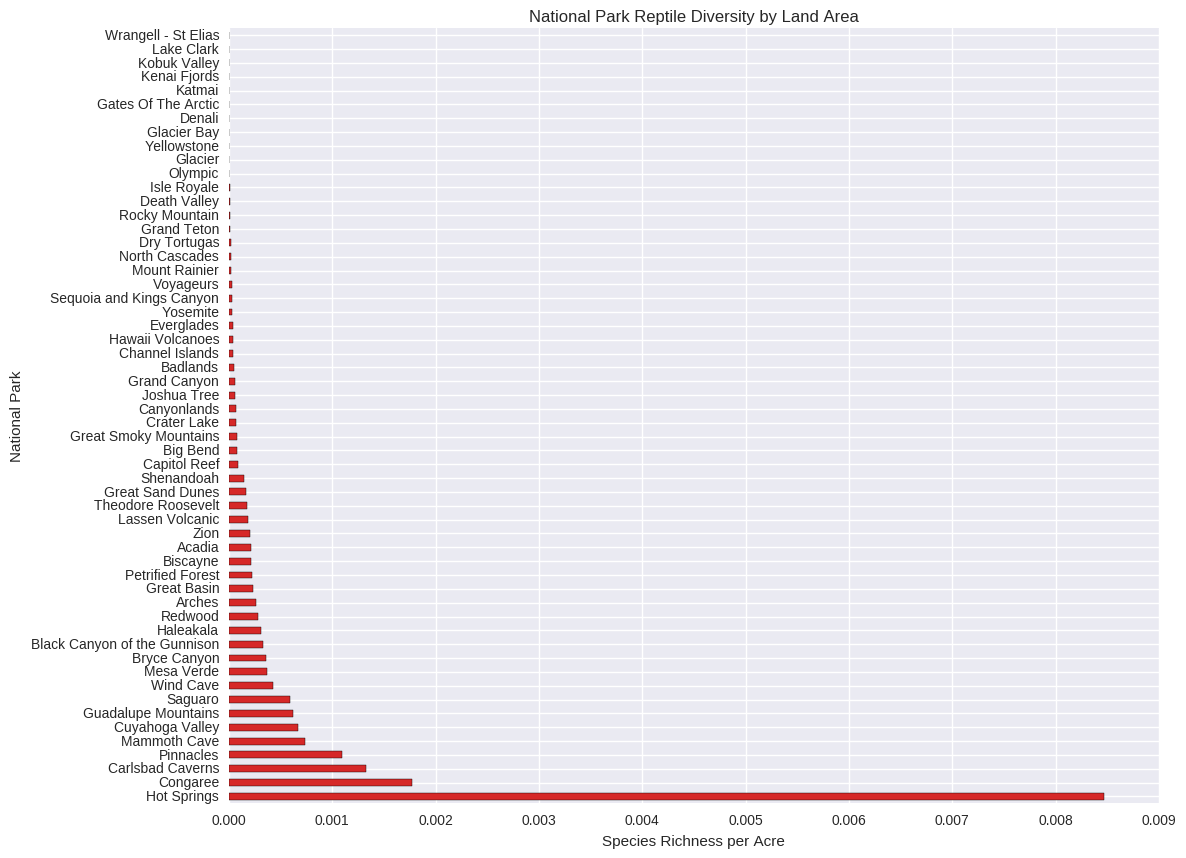

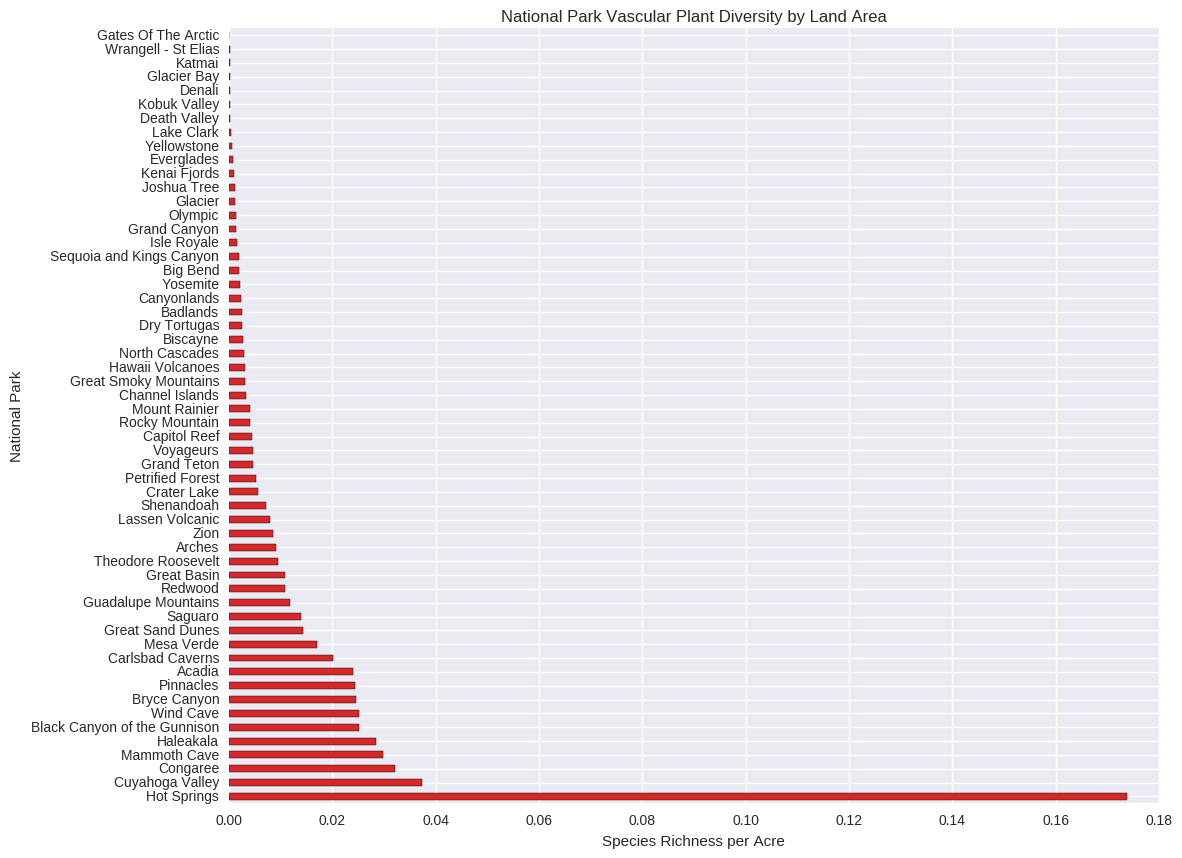

In [131]:
# next, species richness relative to land area
categories = ['Amphibian', 'Bird', 'Fish', 'Mammal', 'Reptile', 'Vascular Plant']
for cat in categories:
    frame = parks_data[cat]/parks_data['Acres']
    frame.sort_values(ascending=False).plot(kind ='barh', figsize=(12,10), y=parks_data['Park Name'], color='#D62828')
    plt.xlabel('Species Richness per Acre')
    plt.ylabel('National Park')
    plt.title('National Park {} Diversity by Land Area'.format(cat))
    plt.show()

In [69]:
spcs_data = pd.DataFrame.to_dict(filtered_spcs, orient='records')

In [5]:
db = client.nps
#db['parks'].insert(park_data)
#db['species'].insert(spcs_data)
cursor = db.species.find()
cursor[0]

In [25]:
parks.to_json(path_or_buf='parks.json',orient='records')